In [8]:
import numpy as np
S0=K=100
sigma = 0.3
r=0.04 # 0.05 in Glasserman
dt = 1/52.0
m = [2**i for i in xrange(8)]
paths = 10000

In [9]:
# estimators
pathwise = np.zeros(len(m))
pathwise2 = np.zeros(len(m))
logratio = np.zeros(len(m))
logratio2 = np.zeros(len(m))
for (j,mi) in enumerate(m):
    for p in xrange(paths):
        S = np.zeros(mi+1)
        S[0] = S0
        Z = np.random.normal(size=mi)
        # stock price follows GBM
        for i in xrange(mi):
            S[i+1] = S[i]*np.exp((r-sigma**2/2)*dt+sigma*np.sqrt(dt)*Z[i])
        Sbar = np.sum(S[1:])/mi
        # pathwise estimation
        tmp = 0.0
        if Sbar > K:
            tmp = np.sum(S[1:]*(np.log(S[1:]/S[0])-(r+sigma**2/2)*dt*np.arange(1,mi+1)))/sigma
        theta = np.exp(-r*mi*dt)/mi*tmp
        pathwise[j] = pathwise[j] + theta/paths
        pathwise2[j] = pathwise2[j] + theta**2
        # logratio estimation
        tmp = 0.0
        if Sbar > K:
            tmp = Sbar - K
        tmp2 = np.sum(Z**2-1)/sigma -np.sum(Z)*np.sqrt(dt)
        theta = np.exp(-r*mi*dt)*tmp*tmp2
        logratio[j] = logratio[j] + theta/paths
        logratio2[j] = logratio2[j] + theta**2
        
        
print pathwise
print logratio
var_p = (pathwise2 - pathwise**2/paths)/(paths-1)
var_lr = (logratio2 - logratio**2/paths)/(paths-1)

[  5.44010874   6.07242044   7.647259     9.80353862  13.35090097
  18.10623244  23.88504829  32.82463973]
[  5.91079544   6.17469864   7.4529283    8.69979331  14.32381439
  19.68517486  25.42103165  33.45809275]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.clf()
figure(figsize=(10,6))
plt.subplot(121)
plt.plot(m,logratio,label='Likelihood Ratio')
plt.plot(m,pathwise,label='pathwise')
plt.legend(loc='upper left')
plt.title('Vega')
plt.ylabel('Estimated Vega')
plt.xlabel('Number of weeks')
plt.grid(True)
plt.subplot(122)
plt.semilogy(m,var_lr,label='Likelihood Ratio')
plt.semilogy(m,var_p,label='pathwise')
plt.legend(loc='upper left')
plt.title('Variance per replication')
plt.ylabel('Variance')
plt.xlabel('Number of weeks')
plt.grid(True,which='both')
plt.tight_layout()

#plt.savefig('test.png')

In [ ]:
[  5.53487332   6.17533879   7.5335626    9.79145049  13.2874627
  17.94946055  24.70312888  33.07049152]
[  5.53922588   6.20845772   7.51778606   9.75173227  13.39627971
  17.57780461  23.42247944  31.64839912]

In [4]:
print var_p

[  102.53584177   131.48651005   197.9115133    352.76615346   682.07432752
  1402.4494276   3060.46812402  7092.94819781]


# Exercise 3

In [9]:
import numpy as np

S0=K=100
T=0.25
sigma=0.3
r=.05
epsilon = np.arange(10,71,dtype=float,step=2)
paths = 50000

theta = np.zeros(len(epsilon))
theta2 = np.zeros(len(epsilon))
for (i,e) in enumerate(epsilon):
    for p in xrange(paths):
        Z = np.random.normal()
        ST = S0*np.exp((r-sigma**2/2)*T+sigma*np.sqrt(T)*Z)
        
        pathwise_part = float(np.abs(ST-K)<e)*ST/S0/(2*e)
        
        likelihood_part = (float(ST > K) - np.minimum(1.,np.maximum(0.,ST-K+e)/(2*e)))*Z/(S0*sigma*np.sqrt(T))
        tmp = np.exp(-r*T)*(pathwise_part + likelihood_part)
        theta[i] = theta[i] + tmp/paths
        theta2[i] = theta2[i] + tmp**2
theta
var = (theta2 - theta**2/paths)/(paths-1)

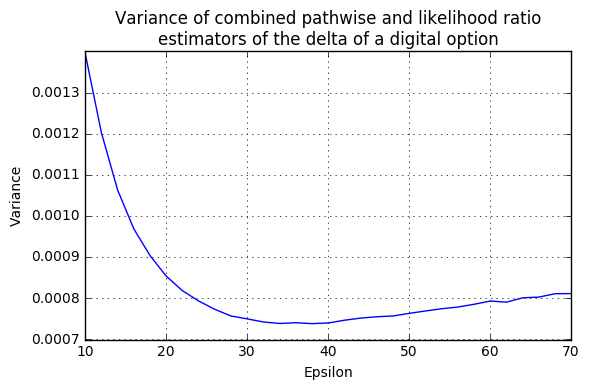

In [10]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(epsilon,var)
plt.title('Variance of combined pathwise and likelihood ratio\nestimators of the delta of a digital option')
plt.ylabel('Variance')
plt.xlabel('Epsilon')
plt.grid(True)
plt.tight_layout()
plt.show()
#plt.savefig('exe3.png')

In [3]:
var

array([ 0.01295061,  0.00435745,  0.0026654 ,  0.00191035,  0.00152338,
        0.00128502,  0.0011311 ,  0.00101188,  0.00093573,  0.00087772,
        0.00083483,  0.00080266,  0.00077994,  0.00076357,  0.00075419,
        0.00074688,  0.00074247,  0.00073844,  0.00074282,  0.00074238,
        0.00074718,  0.0007473 ,  0.00075   ,  0.00075532,  0.00076159,
        0.00076586,  0.00076725,  0.00077607,  0.0007805 ,  0.00078532,
        0.00079164,  0.00079807,  0.00080068,  0.00080996,  0.00080906])